#ETL

In [40]:
#pip install matplotlib

In [41]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# leitura do nosso arquivo csv
df = pd.read_csv("titanic.csv")

In [43]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#quantidades de linhas e colunas
df.shape

(891, 12)

In [45]:
#backup
df_backup = df.copy()

In [46]:
#contar dados nulos em cada coluna 
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [47]:
#contar dados nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [48]:
#descrição dos dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
#verificar as informações

info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [50]:
#remover linhas duplicadas
df = df.drop_duplicates()

In [51]:
#apagar linhas duplicadas da colunas 
df_teste = df.drop_duplicates("PassengerId")

In [52]:
#função das linhas duplicadas 

def visualizar_as_duplicadas(df):
    duplicados = df[df.duplicated(keep=False)]
    
    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df)
print(linhas_duplicadas)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


df.duplicated(keep=False): Identifica todas as linhas duplicadas no DataFrame. <br>
O parâmetro keep=False marca todas as instâncias de duplicados como True.<br>
df[df.duplicated(keep=False)]: Filtra o DataFrame para exibir apenas as linhas que são duplicadas.

In [53]:
#apagar colunas do df
df = df.drop(columns=["SibSp","Parch"])

In [54]:
#apagar as informações NAN
df_teste = df.dropna(subset=["Cabin"])

In [55]:
df_teste.shape

(204, 10)

In [56]:
#reset index
df = df.reset_index(drop=True)

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
# renomear as colunas
df.rename(columns={
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu', 
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Genero', 
    'Age':'Idade', 
    'Ticket':'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine', 
    'Embarked': 'Embarque'
}, inplace=True)


In [59]:
df.columns

Index(['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Genero', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [60]:
#salvar no csv
df.to_csv('titanic_tratado.csv', index=False)

In [61]:
df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


#Análises


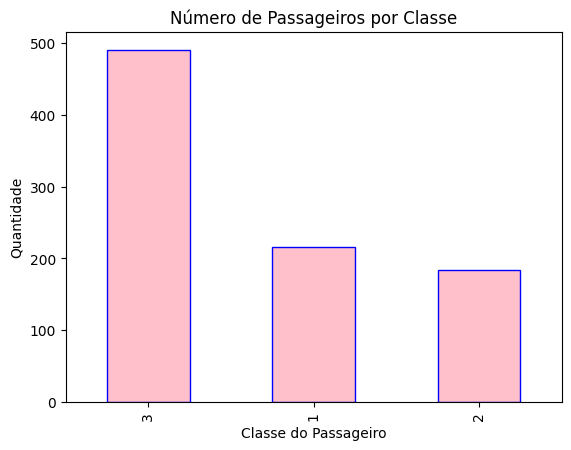

In [62]:
#Quantos passageiros estavam em cada classe do Titanic?

#contagem do número de passageiros
contagem_passeiros = df["Classe"].value_counts()

#criação do grafico
contagem_passeiros.plot(kind="bar", edgecolor="blue", color="pink")

#configurações
plt.xlabel("Classe do Passageiro")
plt.ylabel("Quantidade")
plt.title("Número de Passageiros por Classe")

plt.show()

In [63]:
df.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


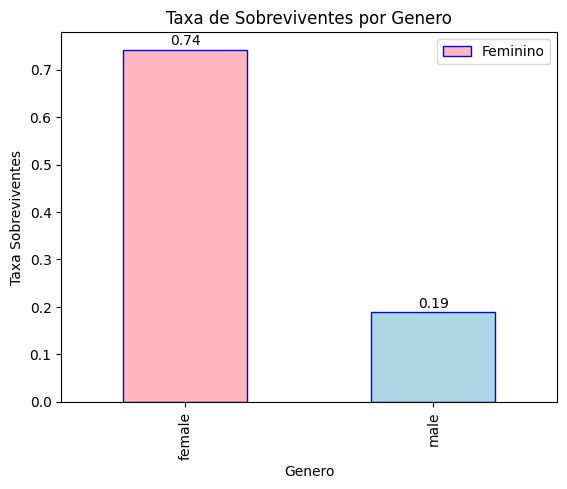

In [64]:
# Qual é taxa de sobreviventes por genero? 

# agrupamento de genero por sobreviventes
taxa_sob_genero = df.groupby("Genero")["Sobreviveu"].mean()

#cores para barras
cores = ["lightpink","lightblue"]

# plotagem
barras = taxa_sob_genero.plot.bar(edgecolor = "blue", color= cores)

# os rotulos
plt.xlabel("Genero")
plt.ylabel("Taxa Sobreviventes")
plt.title("Taxa de Sobreviventes por Genero")

#adicionar legendas
plt.legend(["Feminino", "Masculino"])


#adicionar rotulos nos graficos
for i, v in enumerate(taxa_sob_genero):
    barras.text(i, v + 0.01, f'{v:.2f}', color = 'black', ha = 'center')

plt.show()

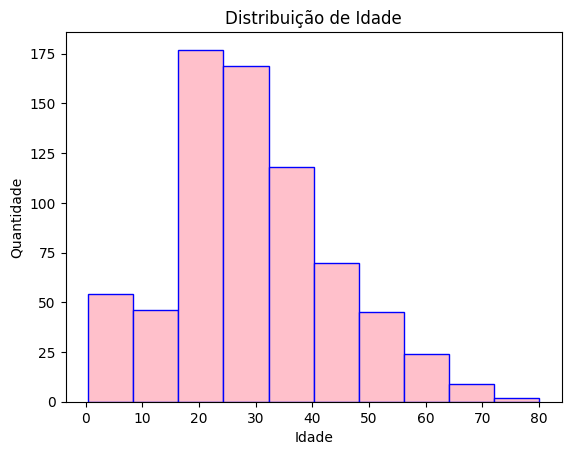

In [65]:
#Qual é a distribuição de idades?

#plotagem
df["Idade"].plot.hist(bins=10, edgecolor= "blue", color="pink")

plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")

plt.show()

In [66]:
df.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


# Teste Hipóteses

Teste de Idade e Sobrevicência

Hipótese Nula H0: Os sobreviventes não tem relacão com a Idade dos passageiros.
Hipótese Alternativa H1: Sobreviventes tem relação com a Idade dos passeiros. 

In [67]:
from scipy.stats import ttest_ind
import seaborn as sns

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Idade, Length: 290, dtype: float64
Teste T de idade
Estatística T : -2.06668694625381
Valor P: 0.03912465401348249


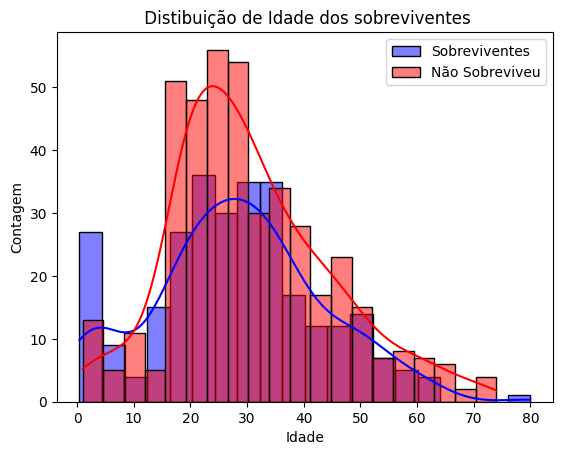

Rejeitamos a hipótese nula


In [77]:
#amostras
idade_sobriventes = df[df['Sobreviveu']== 1]['Idade'].dropna()
idade_nao_sobreviveu = df[df['Sobreviveu']==0]['Idade'].dropna()
print(idade_sobriventes)
# Teste t
estatistica_t, valor_p = ttest_ind(idade_sobriventes, idade_nao_sobreviveu)

print("Teste T de idade")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")

#grafico
sns.histplot(idade_sobriventes, color= 'blue', label ='Sobreviventes', kde=True, bins= 20)
sns.histplot(idade_nao_sobreviveu, color = 'red', label = 'Não Sobreviveu', kde=True, bins= 20)

#rotulos
plt.legend()
plt.title(" Distibuição de Idade dos sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")


In [69]:
df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


In [70]:
df.shape

(891, 10)

#Amostra e SQL


In [71]:
#amostra 
baby_df = df.sample(100)

In [72]:
baby_df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,110465,52.0000,A14,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,PC 17596,29.7000,C118,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,349257,7.8958,NaN,S


In [73]:
baby_df.shape

(100, 10)

In [74]:
import sqlite3

In [75]:
# conexão 
conn = sqlite3.connect(':memory:')

#escrever o df em uma tabela sql
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace') 

#executar a consulta 
query_sql = """
SELECT Genero, COUNT(IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Genero;
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn)
print(contagem_por_gen)

#fechar a conexão
conn.close()

   Genero  Contagem
0  female        30
1    male        70


In [76]:
#pandas
contagem_por_genero = baby_df['Genero'].value_counts().reset_index()
contagem_por_genero.columns = ['Genero', 'Contagem']
print(contagem_por_genero)

   Genero  Contagem
0    male        70
1  female        30
